In [609]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
import warnings
warnings.filterwarnings("ignore")



%matplotlib inline 


In [583]:
#Load the data and check the shape.
df=pd.read_csv("diabetes2.csv")
df.shape

(768, 9)

In [584]:
#Check the data head.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [585]:
#check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [586]:
#check for null values and duplicated rows 
print("Numbers of null values:--->\n",df.isnull().sum())
print("\n")
print("Numbers of duplicated rows:--->",df.duplicated().sum())

Numbers of null values:--->
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Numbers of duplicated rows:---> 0


we have no null values and duplicated rows in our dataset ,that's good !!!!!

In [587]:
#check the data description.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In our dataset we found some of the columns are contain 0 values which is not good or expected.such as Blood pressure,skin thickness, Bmi ,insulin,Glucose columns are contain 0 values so we replace the 0 values into Nan and then impute something on this Nan field...


In [588]:
#check the correltion between outcome to each of columns .
df.corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

Glucose ,bmi and age col is highly propotional to the outcome columns 

<AxesSubplot:>

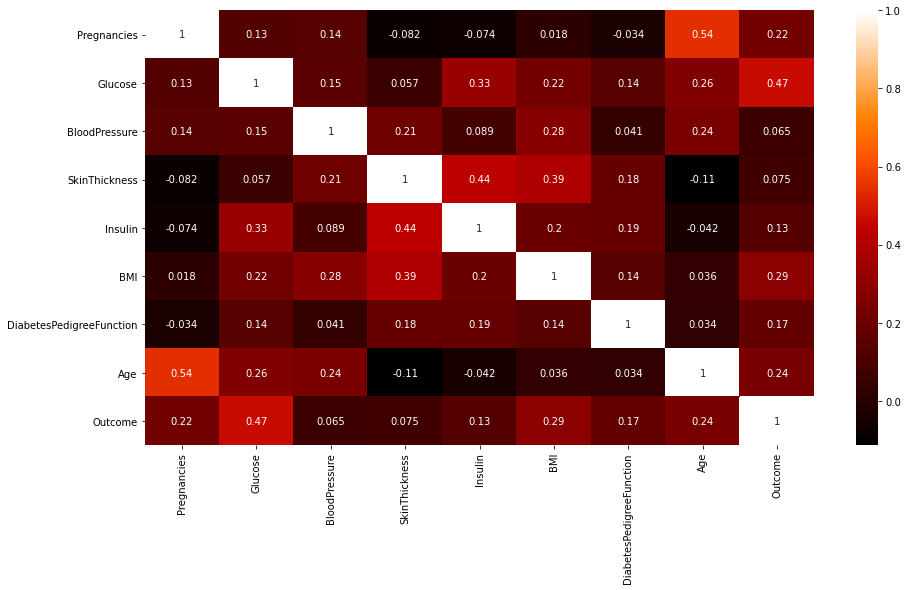

In [589]:
#analysis the correaltion with heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="gist_heat")

There are no highly correlated independent features or multicolinarity problems ,great !!!!!!

In [590]:
#counting how many 0 values contain on these columns
zeros_col=[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
def zeroes_checker(df,zeros_col):
    for col in zeros_col:
        df_count=(df[col]==0).sum()
        print(f"The number of zeros in col {col} is --> {df_count}")
zeroes_checker(df,zeros_col) #calling the function.        

The number of zeros in col Glucose is --> 5
The number of zeros in col BloodPressure is --> 35
The number of zeros in col SkinThickness is --> 227
The number of zeros in col Insulin is --> 374
The number of zeros in col BMI is --> 11


In [591]:
# Now replace the 0 with Nan
zeros_col=[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

def filNan(zeros_col):
    for col in zeros_col:
        df[col]=df[col].replace(0,np.NaN)
filNan(zeros_col) #calling the function

#check for null values 
def null_checker(df):
    for col in df.columns:
        count=df[col].isna().sum()
        print(f"The number of null values in col {col} is --> {count}")
null_checker(df) #calling the function.        

The number of null values in col Pregnancies is --> 0
The number of null values in col Glucose is --> 5
The number of null values in col BloodPressure is --> 35
The number of null values in col SkinThickness is --> 227
The number of null values in col Insulin is --> 374
The number of null values in col BMI is --> 11
The number of null values in col DiabetesPedigreeFunction is --> 0
The number of null values in col Age is --> 0
The number of null values in col Outcome is --> 0


great !! we replace the 0 values with NaN,now we have missing values in our dataset,lets fill or impute the missing values

In [592]:
#get the features and terget columns
X=df.iloc[:,0:-1]
y=df.Outcome
y=pd.DataFrame(y,columns=["Outcome"])

#It is a good practise to split the data to avoiding the data leakage 
#train test split  
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)


X_train shape:  (614, 8)
X_test shape:  (154, 8)
Y_train shape:  (614, 1)
Y_test shape:  (154, 1)


In [593]:
#impute the missing values with knn imputer.
knn_im=KNNImputer()
x_train[zeros_col]=knn_im.fit_transform(x_train[zeros_col])
x_test[zeros_col]=knn_im.transform(x_test[zeros_col])
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,67.0,26.285714,73.142857,31.485714,0.304,21
618,9,112.0,82.0,24.000000,110.000000,28.200000,1.282,50
346,1,139.0,46.0,19.000000,83.000000,28.700000,0.654,22
294,0,161.0,50.0,27.071429,235.000000,21.900000,0.254,65
231,6,134.0,80.0,37.000000,370.000000,46.200000,0.238,46


# EDA for data analysis

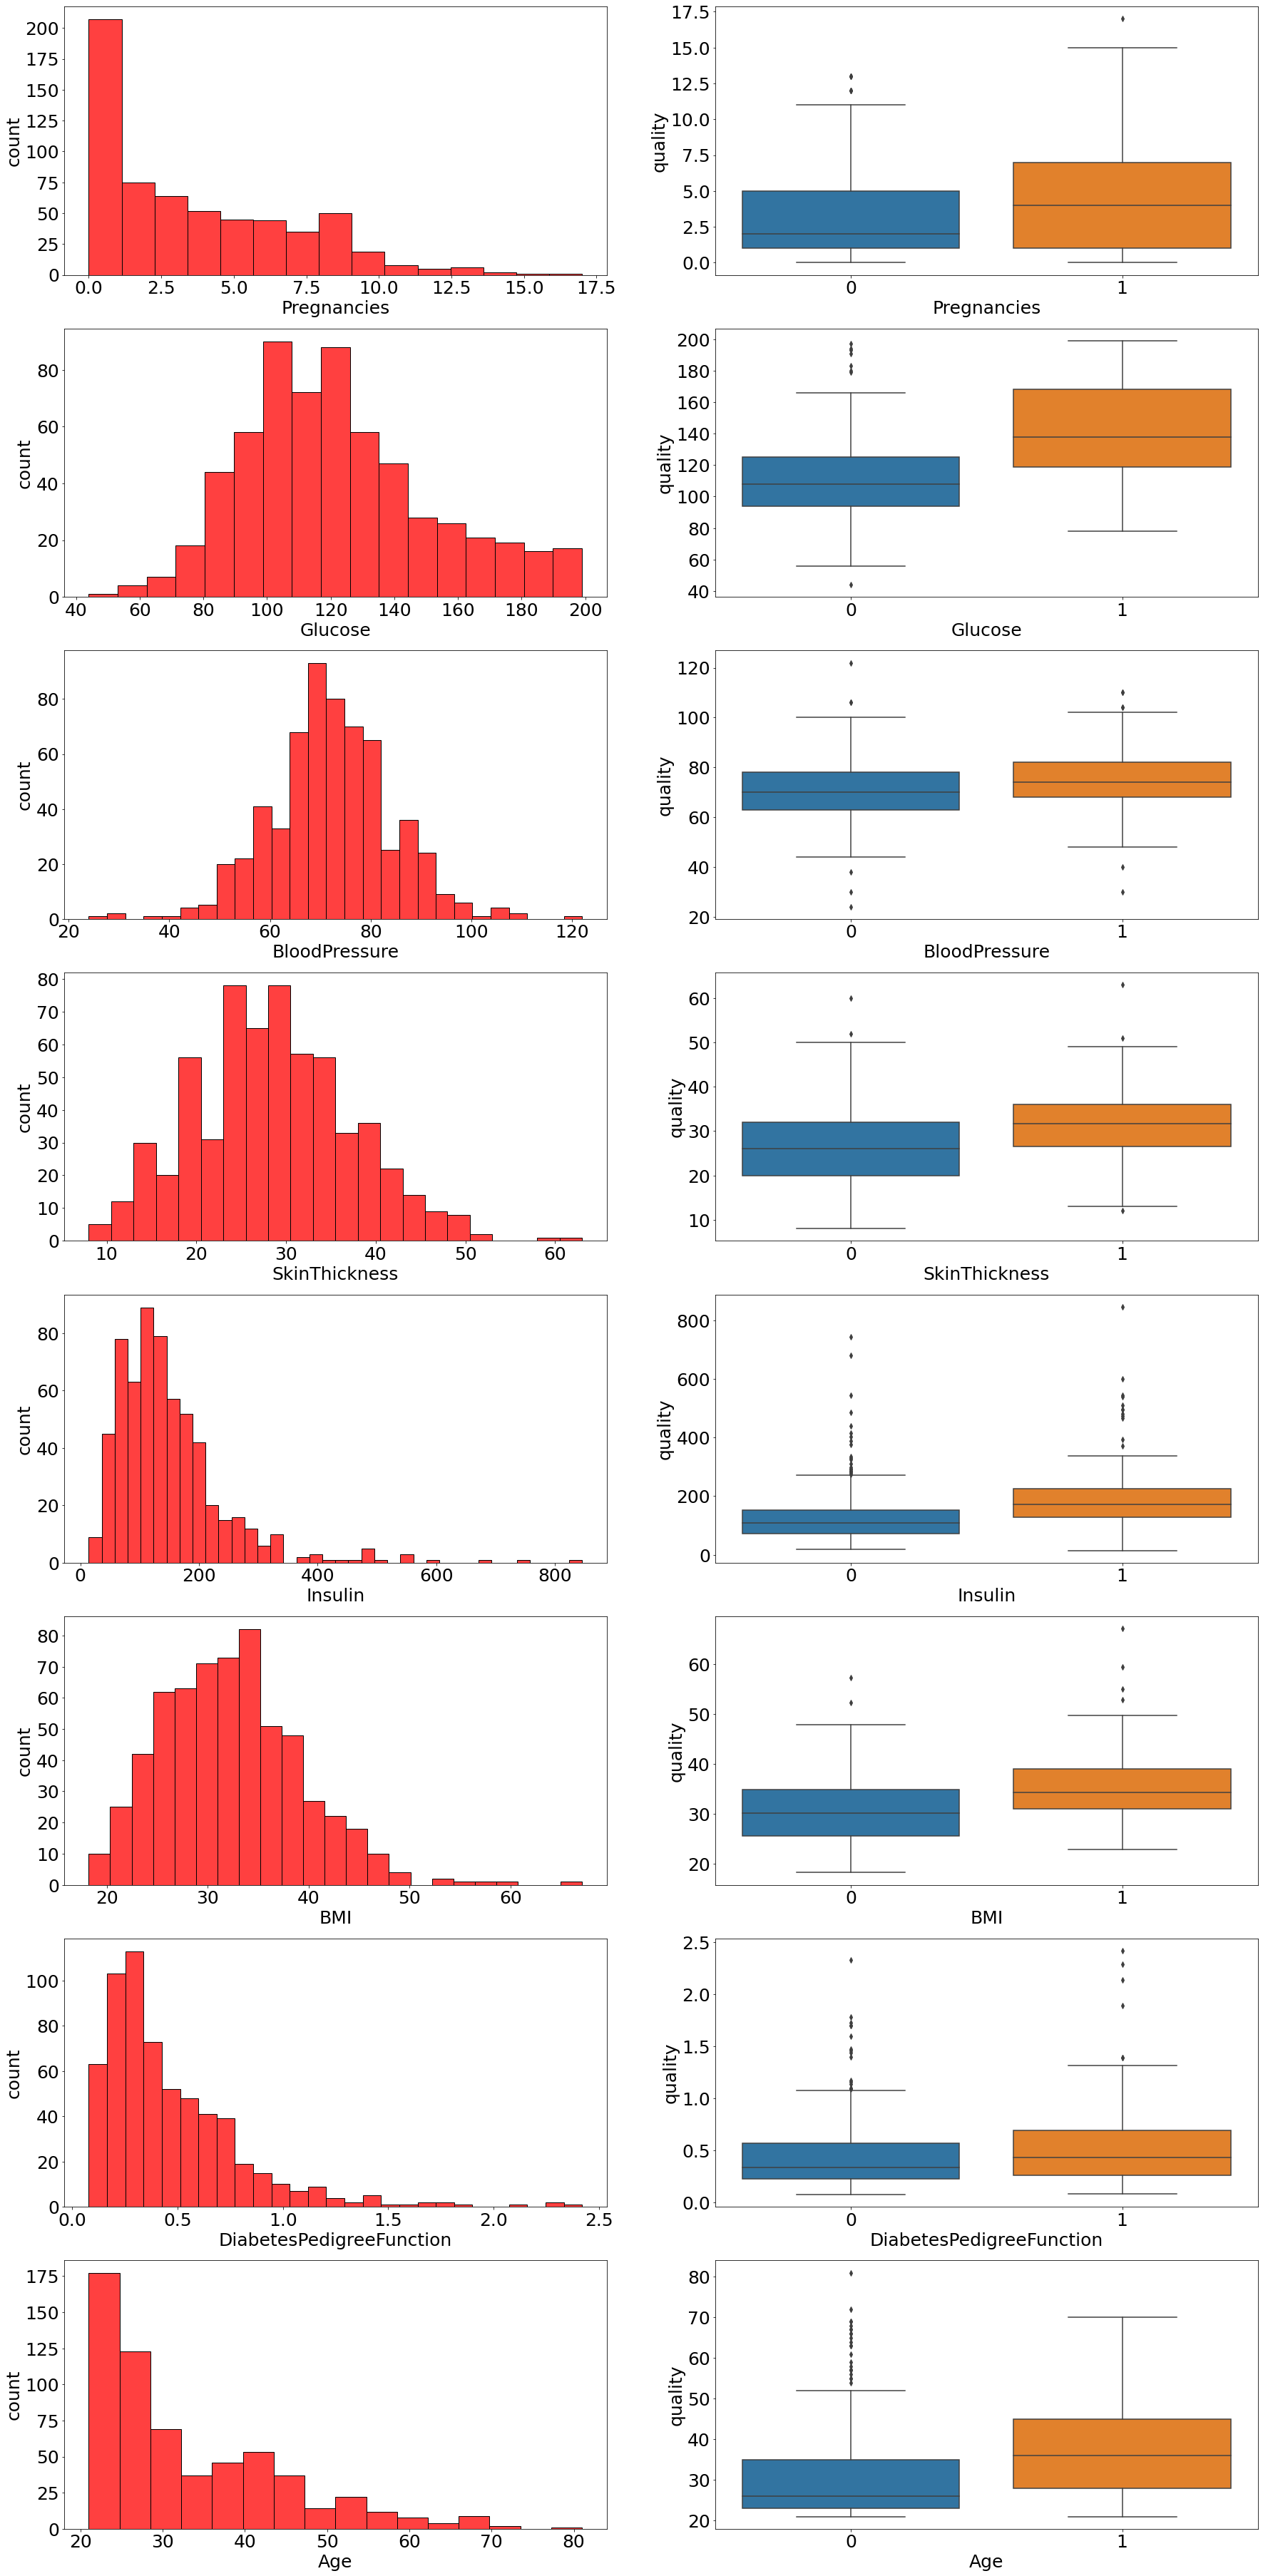

In [594]:
#analysing features cloumns with histogram  and boxplot
#using histogram we perform univariate analysis
#using box plot we perform bi-variate analysis
i=1
plt.figure(figsize=(30,90))
for col in x_train.columns:
    plt.subplot(11,2,i)
    sns.histplot(x_train[col],color="red")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    
    i=i+1
    plt.subplot(11,2,i)
    sns.boxplot(y["Outcome"],x_train[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("quality",fontsize=25)
    i=i+1

plt.show()

from this analysis we got some right skewed columns and some col contain outliers as we discuss earlier ....we should fix them later!!!!!!

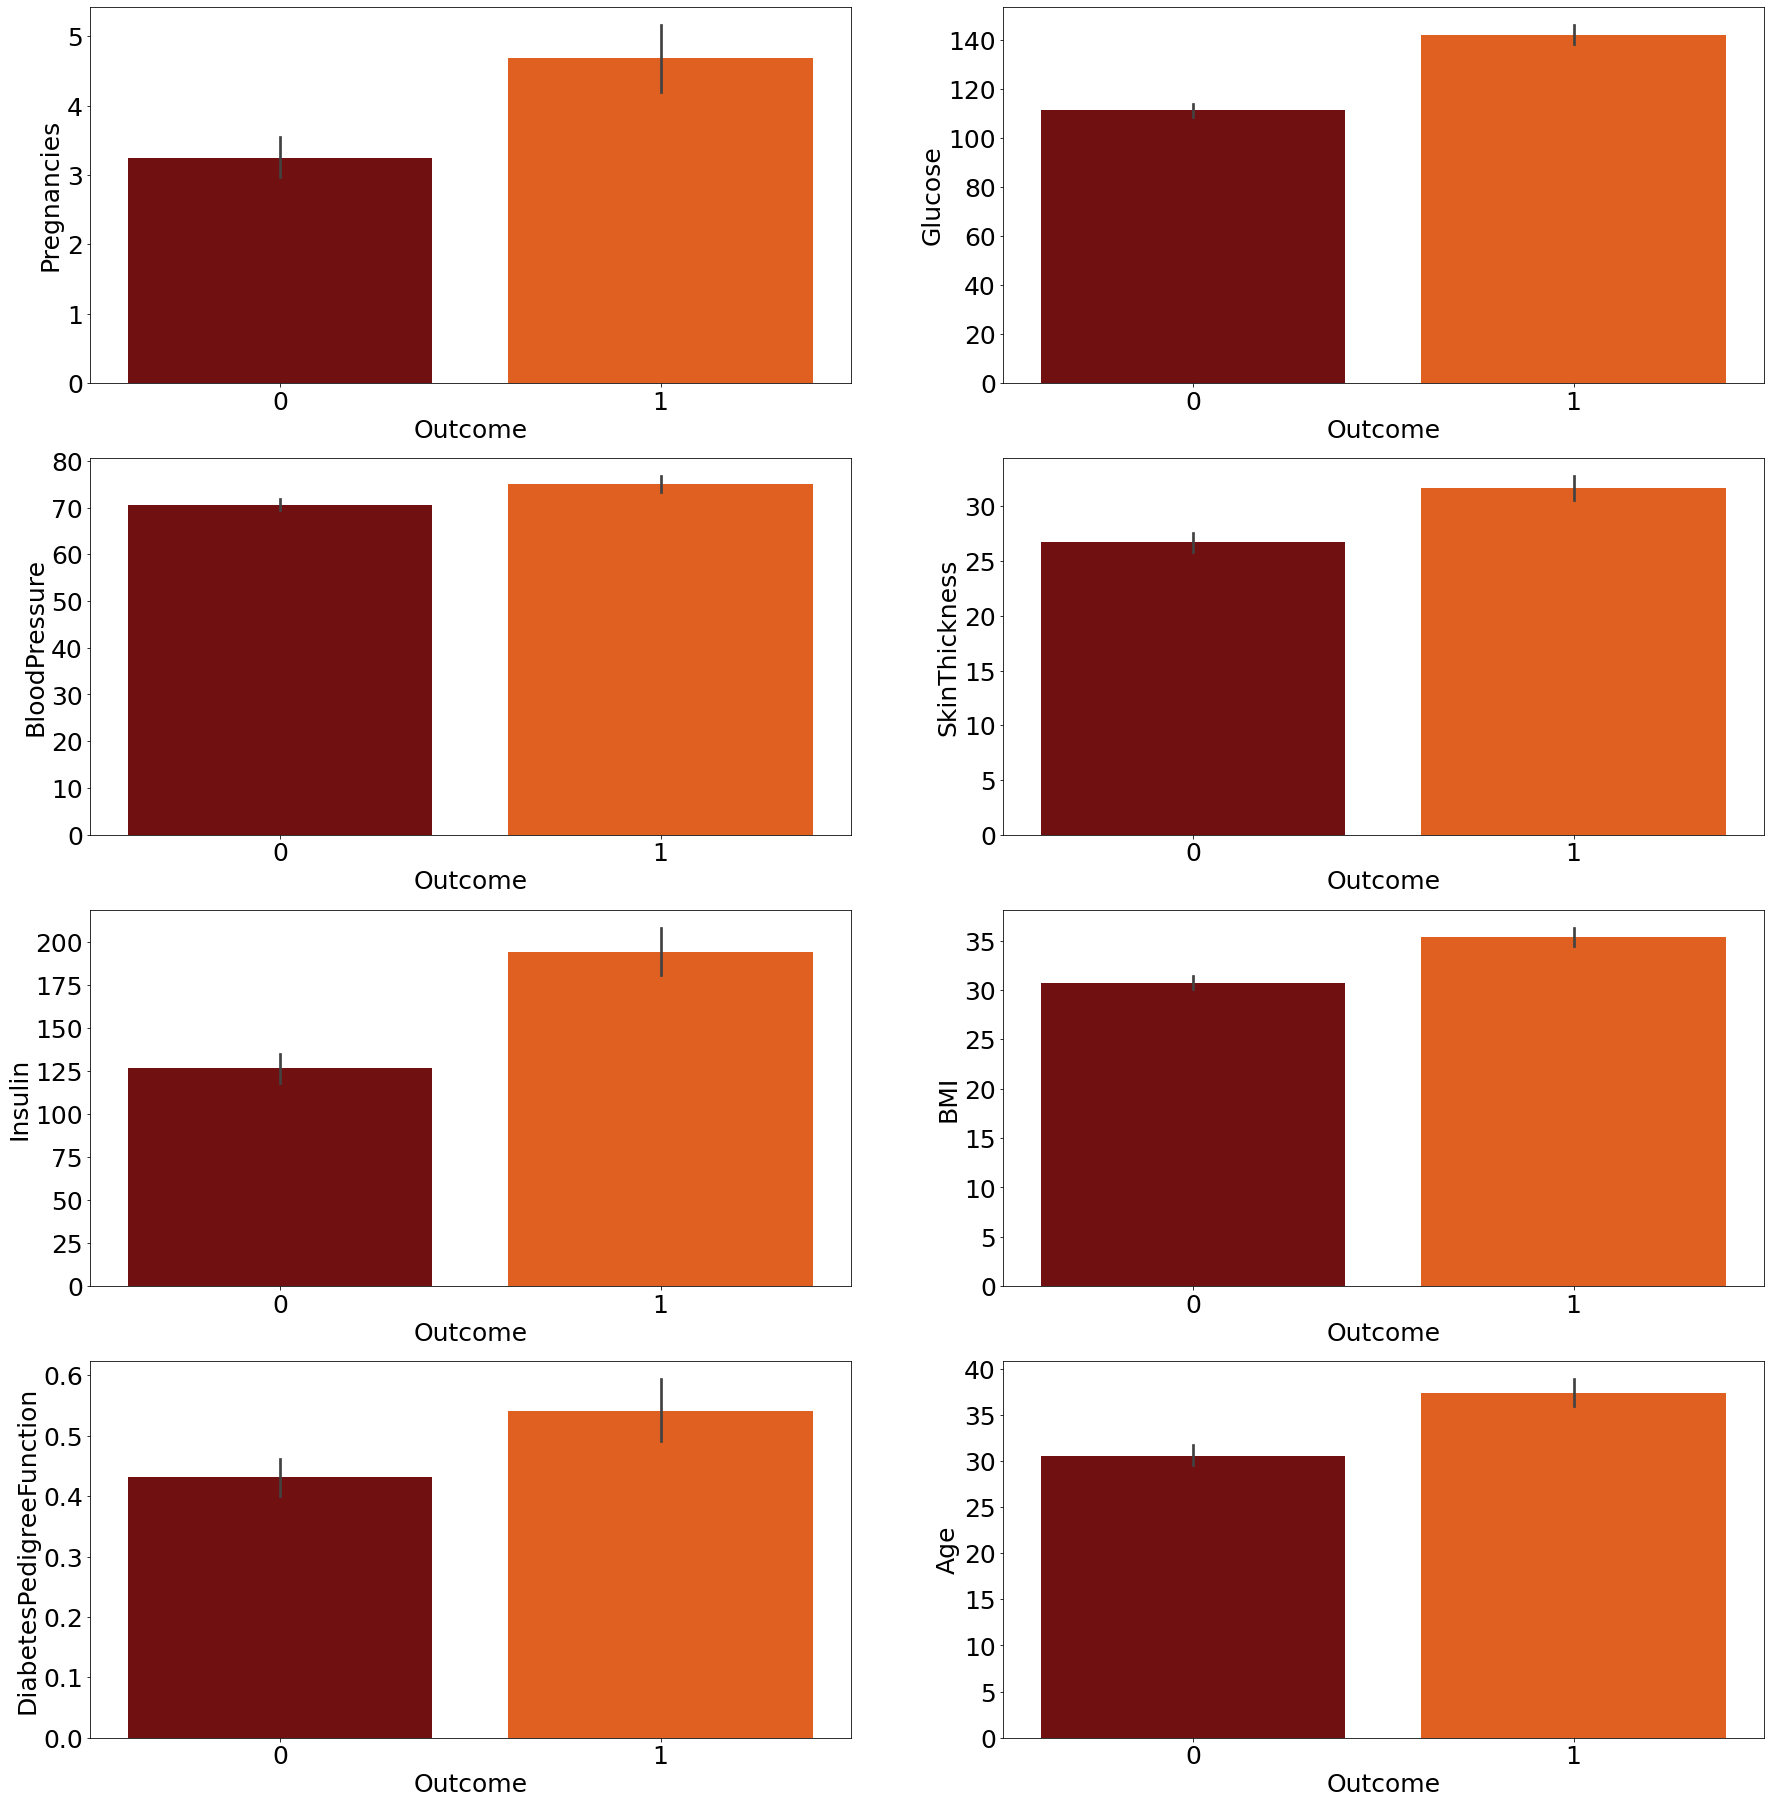

In [595]:
# Analysis each of the columns with Outcome col using BarPlot
i=1
plt.figure(figsize=(30,90))
for col in x_train.columns:
    plt.subplot(11,2,i)
    sns.barplot(y["Outcome"],x_train[col],palette = "gist_heat")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel("Outcome",fontsize=25)
    plt.ylabel(col,fontsize=25)
    
    i=i+1

plt.show()

Outcome
0          401
1          213
dtype: int64


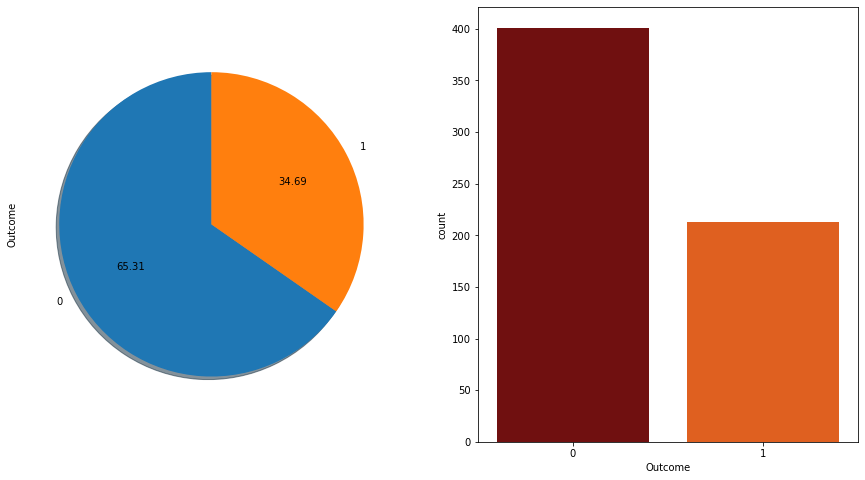

In [596]:
# check the classes of terget columns are balanced or not....
print(y_train.value_counts())

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y_train["Outcome"].value_counts().plot(kind="pie",autopct="%.2f",shadow=True, startangle=90)

plt.subplot(1,2,2)
sns.countplot(y_train["Outcome"],palette="gist_heat")

plt.show()

It seems fine but not properly ,we keep this and move to the next

In [597]:
# Let's check for skewed columns
def distribution(data):
    #let find the skewed col and fix them
    skew_limit=0.75 # limit for skewed col
    skew_vals=data[X.columns].skew()
    skew_col=skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending =False)
    
    #graphically represent the skewed col
    i=1    
    print("Columns names: ",skew_col.index)
    print("\n\n")
    print(skew_col)
    plt.figure(figsize=(40,100))
    for col in skew_col.index:
        plt.subplot(8,2,i)
        sns.distplot(X[col],color="r")
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=25)
        plt.xlabel(col,fontsize=25)
        i=i+1
        

    plt.show()

Columns names:  Index(['Insulin', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies'], dtype='object')



Insulin                     2.444612
DiabetesPedigreeFunction    2.094005
Age                         1.181449
Pregnancies                 0.935022
dtype: float64


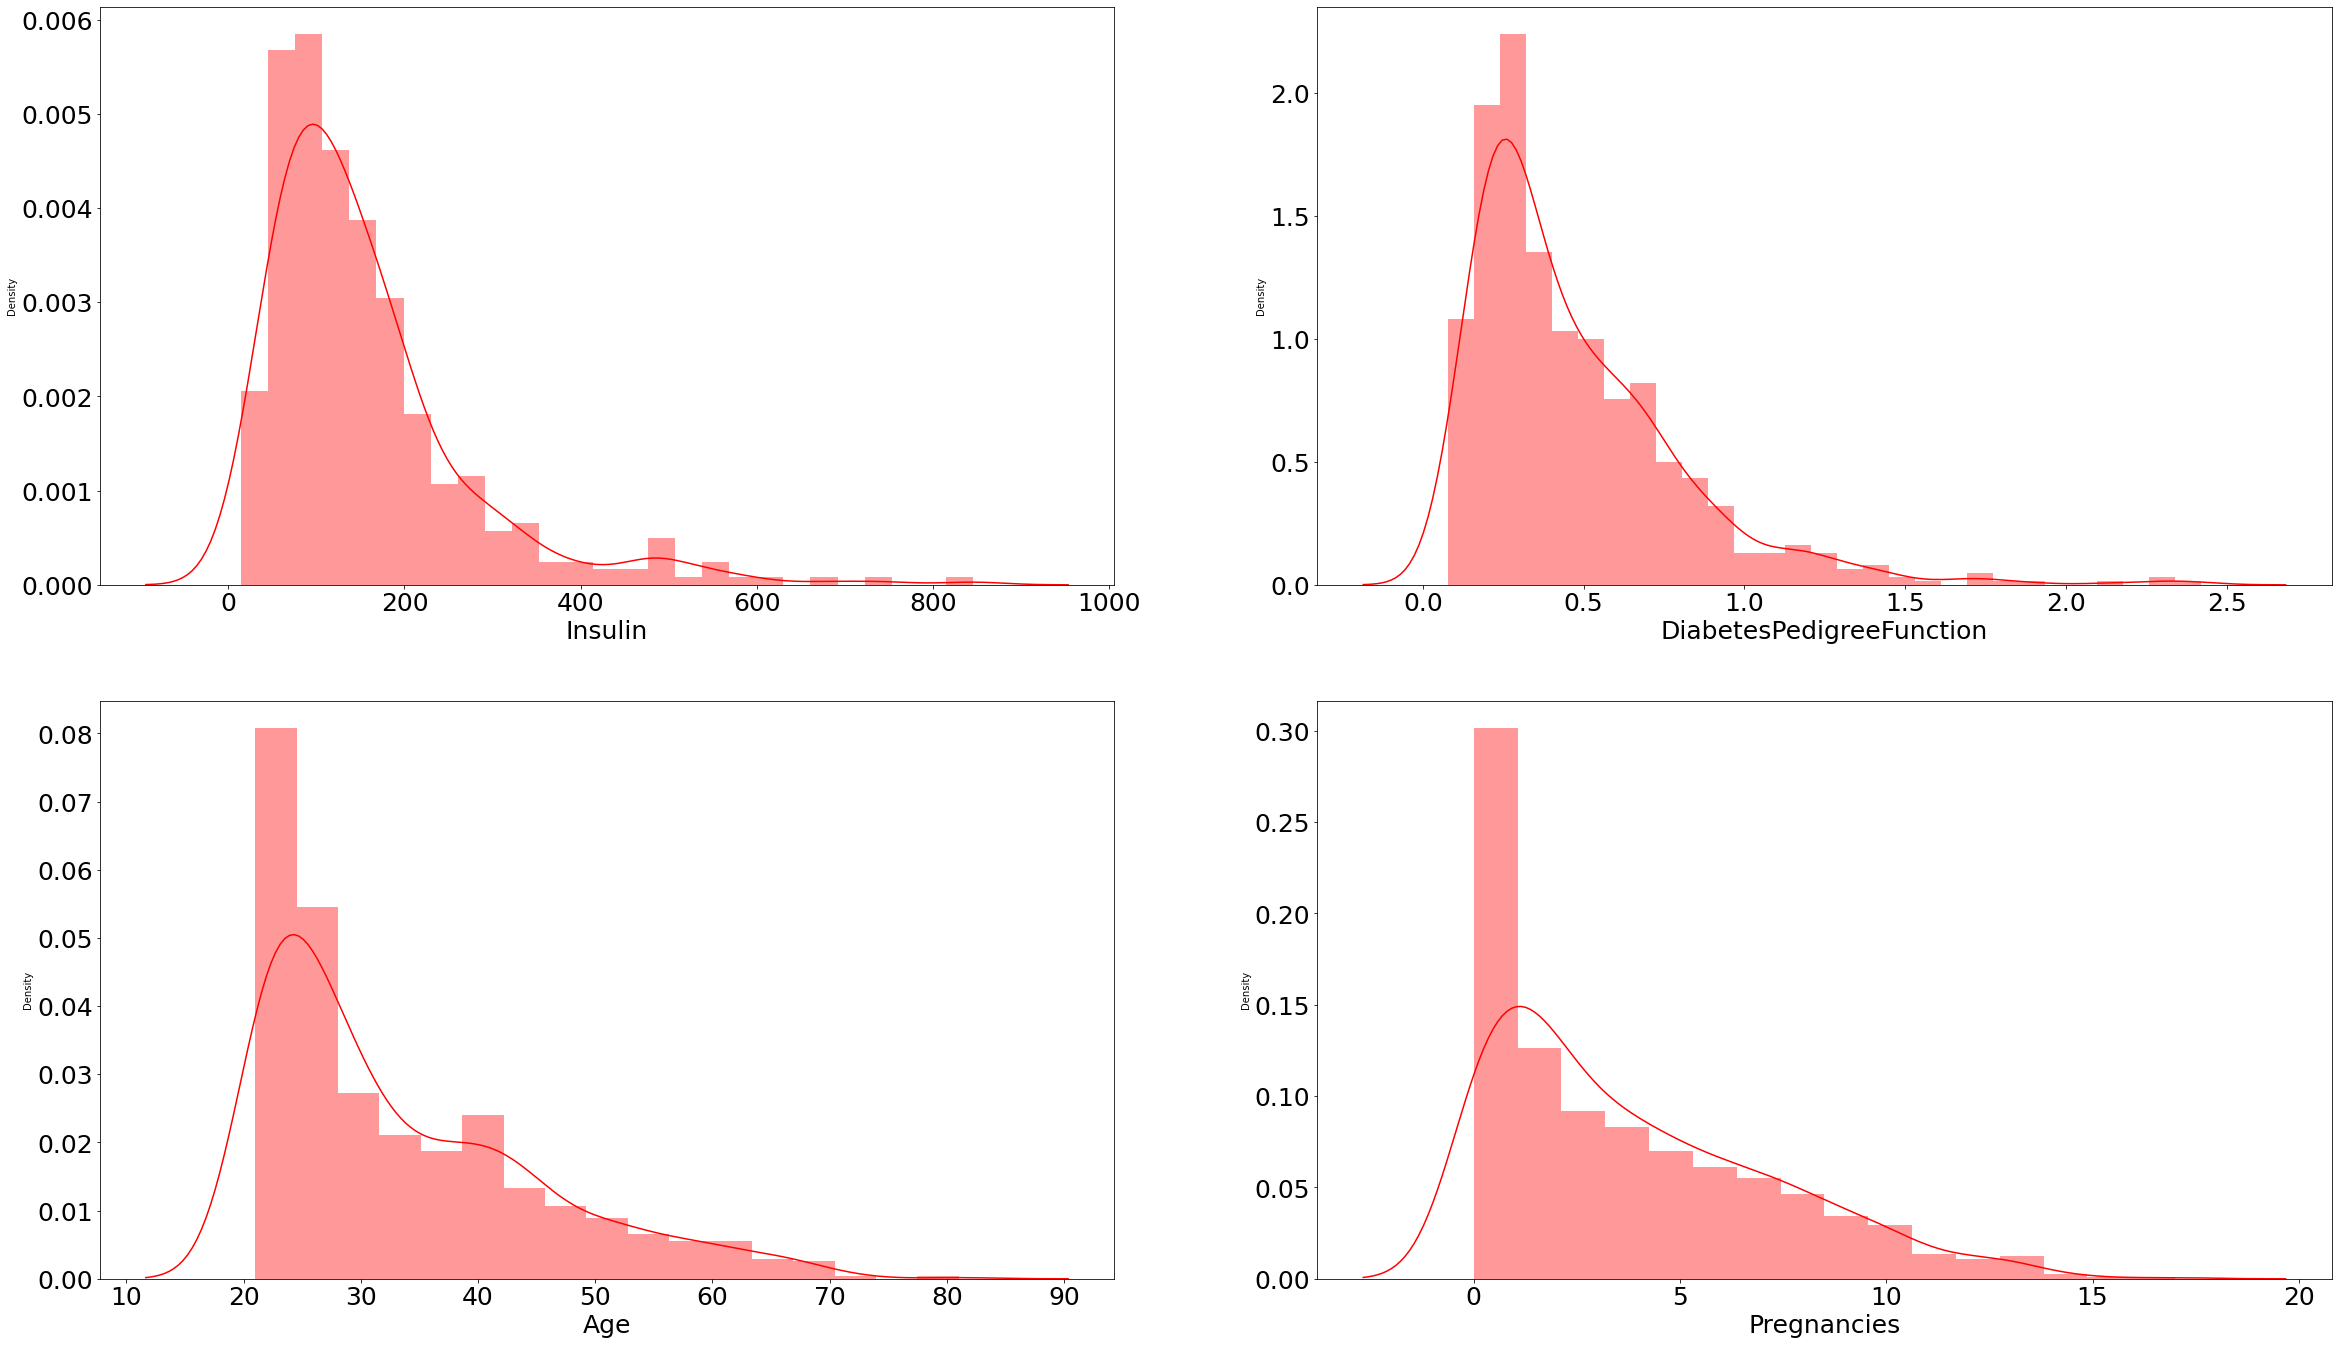

In [598]:
#calling the function for checking the skewed colmuns
distribution(x_train)

we got 4 skewed columns in x_train ,we shloud fix them by function transformer or power transformer...

Columns names:  Index(['SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age',
       'Pregnancies'],
      dtype='object')



SkinThickness               1.871732
Insulin                     1.458865
DiabetesPedigreeFunction    1.033644
Age                         0.938371
Pregnancies                 0.770600
dtype: float64


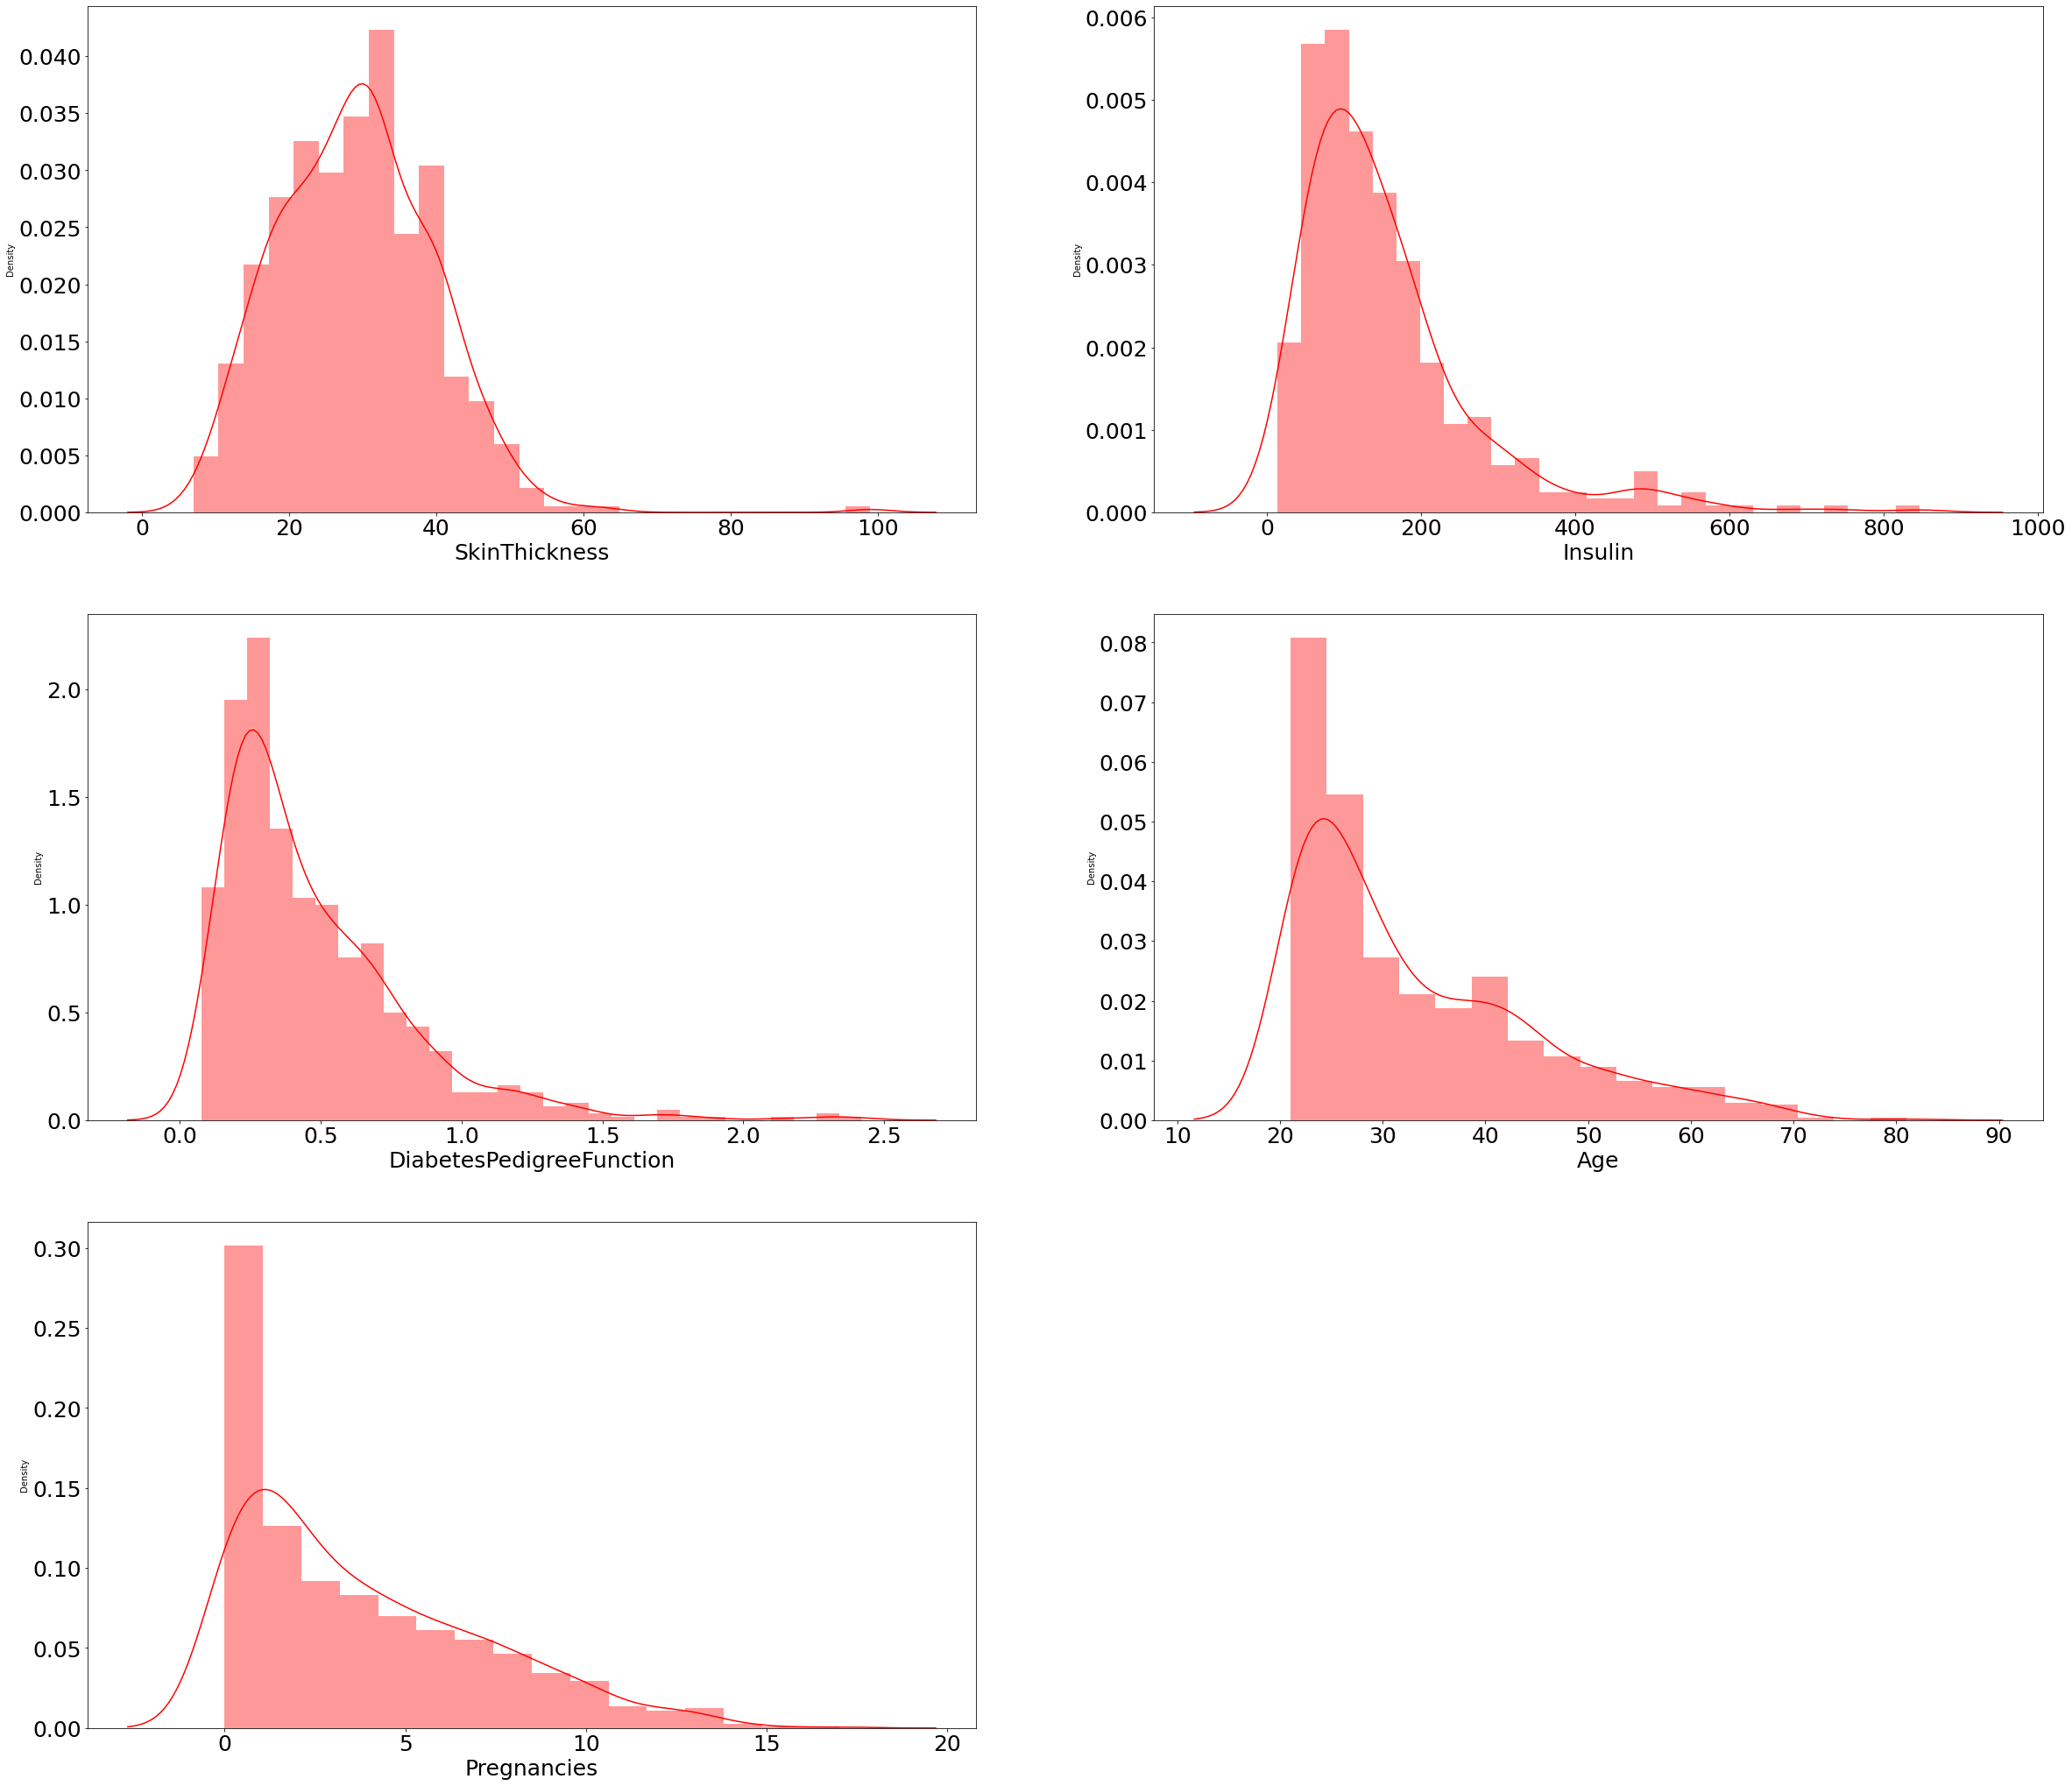

In [599]:
distribution(x_test)

 In x_test we got 5 skewed columns 

In [600]:
#fix the skewed columns using function 
skewed_col_xtrain=['Insulin', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies']#our skewed col list.
skewed_col_xtest=["SkinThickness",'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies']#our skewed col list.
ft=FunctionTransformer(func=np.log1p)
x_train[skewed_col_xtrain]=ft.fit_transform(x_train[skewed_col_xtrain])
x_test[skewed_col_xtest]=ft.transform(x_test[skewed_col_xtest])
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,1.098612,84.0,67.0,26.285714,4.305994,31.485714,0.265436,3.091042
618,2.302585,112.0,82.0,24.000000,4.709530,28.200000,0.825052,3.931826
346,0.693147,139.0,46.0,19.000000,4.430817,28.700000,0.503197,3.135494
294,0.000000,161.0,50.0,27.071429,5.463832,21.900000,0.226338,4.189655
231,1.945910,134.0,80.0,37.000000,5.916202,46.200000,0.213497,3.850148


we fix our skewed columns , great !!!!!

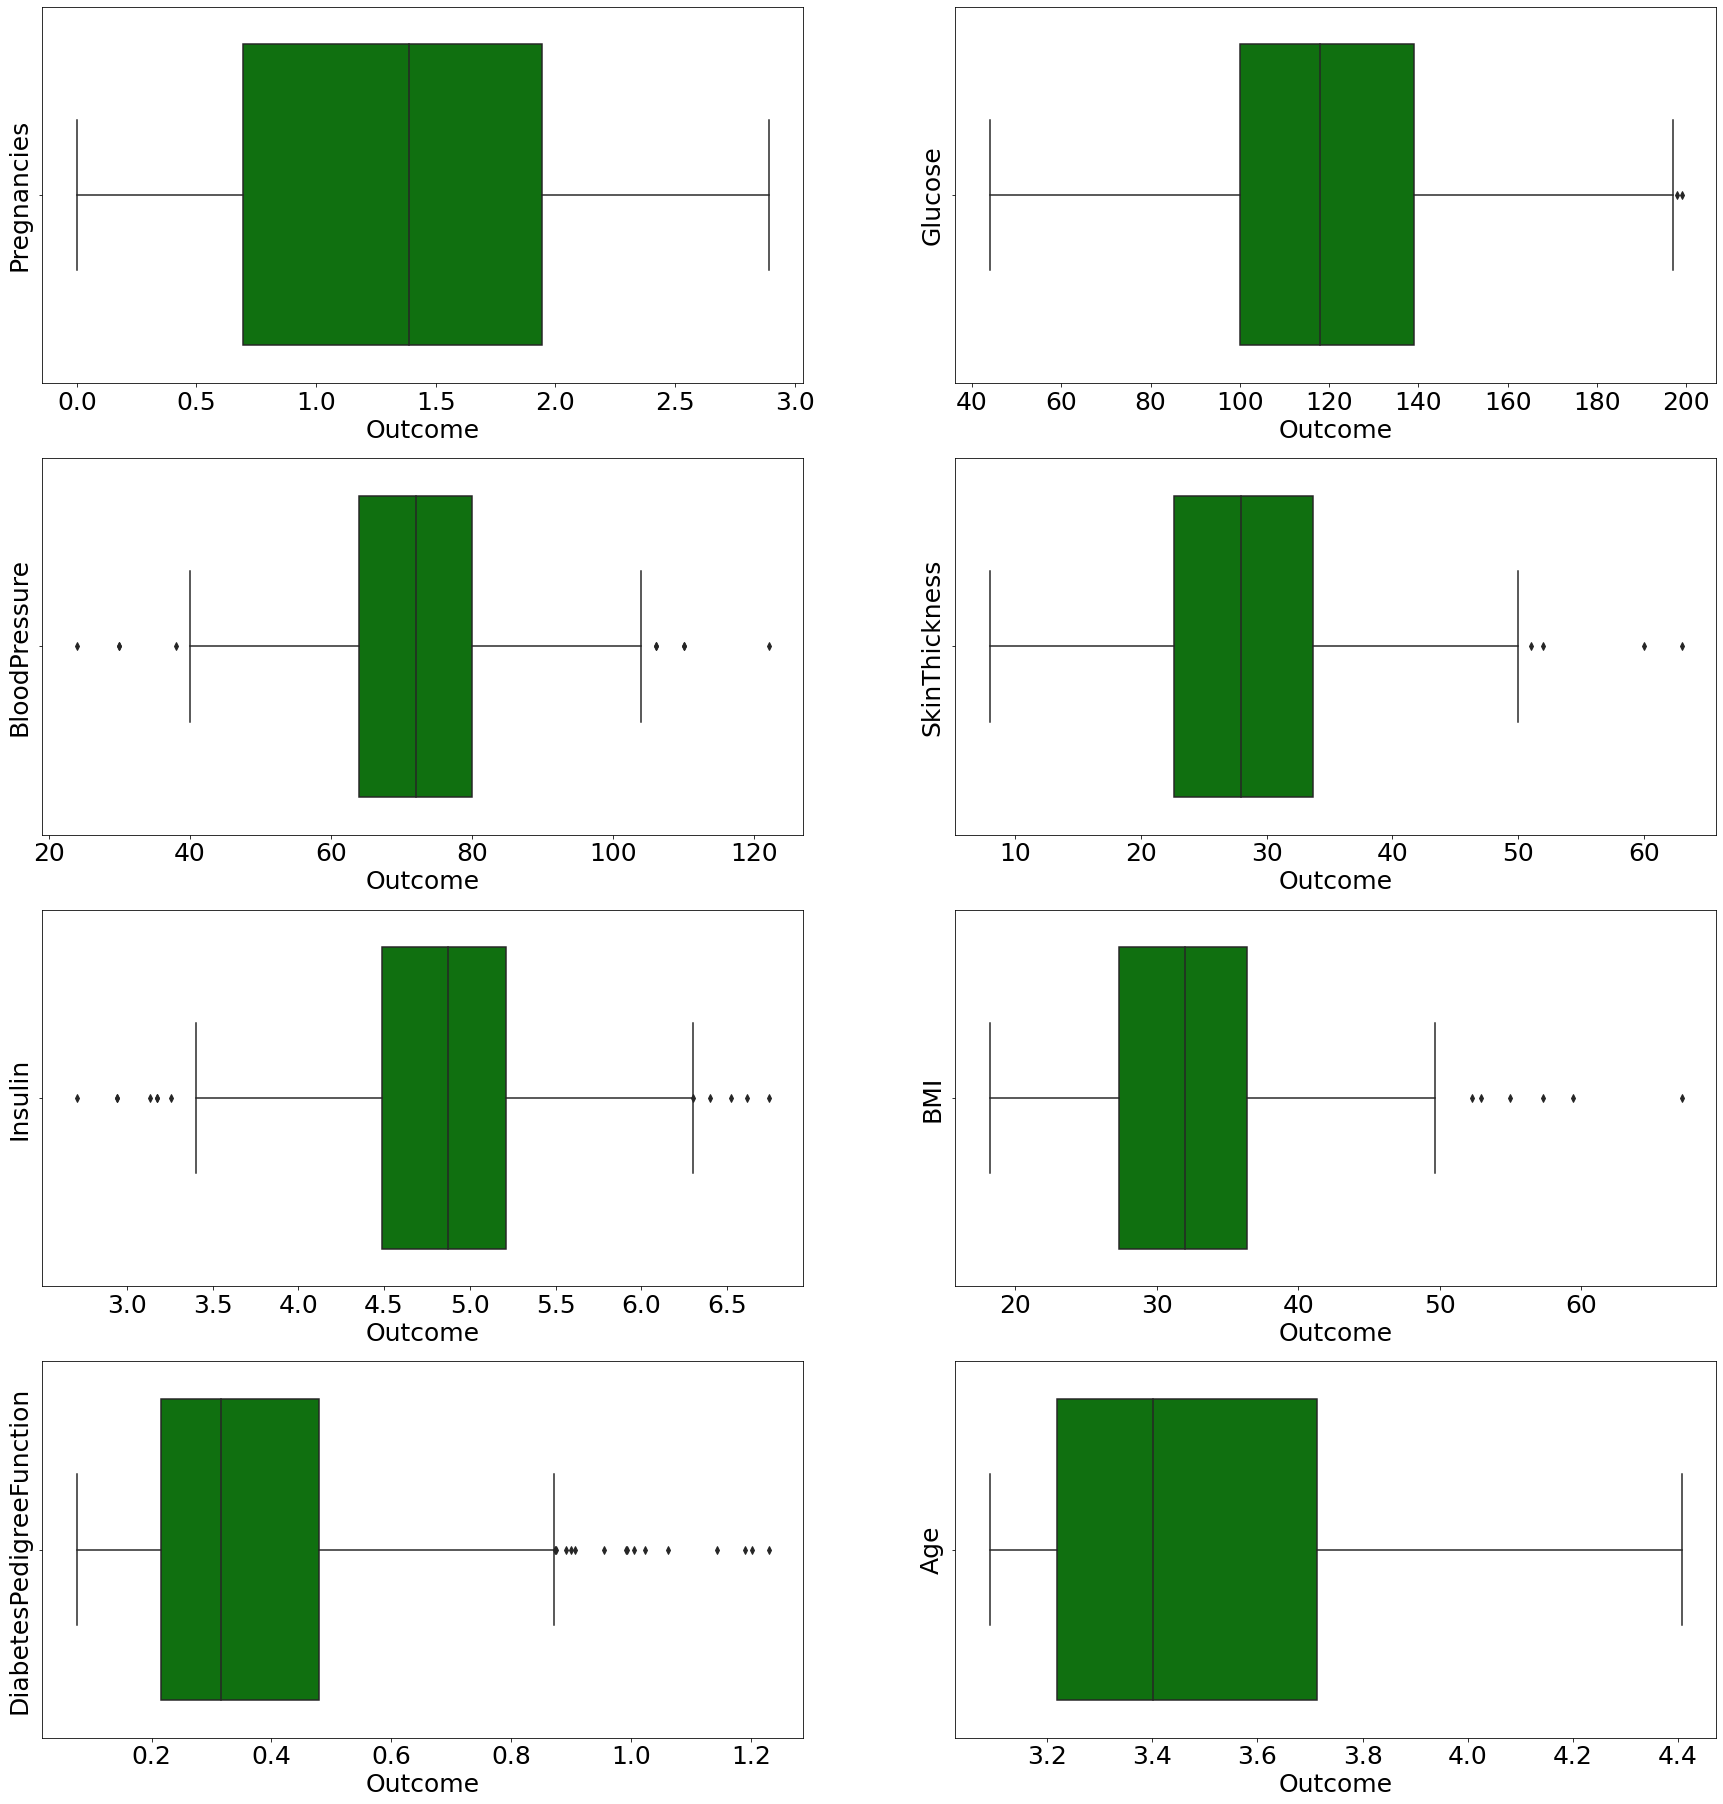

In [601]:
# outlier detection
i=1
plt.figure(figsize=(30,90))
for col in x_train.columns:
    plt.subplot(11,2,i)
    sns.boxplot(x_train[col],color="green")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel("Outcome",fontsize=25)
    plt.ylabel(col,fontsize=25)
    
    i=i+1

plt.show()

In [602]:
#With this function we detect the outliers 
def outlier(df):
    mean=df.mean()
    std=df.std()
    mini=df.min()
    maxi=df.max()

    #let find the boundaries for outlier
    highest=df.mean() + 3*df.std()
    lowest=df.mean() - 3*df.std()

        #finally, let find the outlier
    outliers=x_train[(df>highest) | (df<lowest)]
        
    return outliers


In [603]:
#outliers detection and remove
x_train_out=x_train.columns
for col in x_train_out:
    test=outlier(x_train[col])
    print("columns name :",col)
    print("numbers of outliers:",len(test))
    print("<<<<<<<<<------------------------------------->>>>>>>>>")
    x_train=x_train.drop(test.index,axis=0)#drop the outliers by thier index
    y_train=y_train.drop(test.index,axis=0)

columns name : Pregnancies
numbers of outliers: 0
<<<<<<<<<------------------------------------->>>>>>>>>
columns name : Glucose
numbers of outliers: 0
<<<<<<<<<------------------------------------->>>>>>>>>
columns name : BloodPressure
numbers of outliers: 6
<<<<<<<<<------------------------------------->>>>>>>>>
columns name : SkinThickness
numbers of outliers: 2
<<<<<<<<<------------------------------------->>>>>>>>>
columns name : Insulin
numbers of outliers: 5
<<<<<<<<<------------------------------------->>>>>>>>>
columns name : BMI
numbers of outliers: 3
<<<<<<<<<------------------------------------->>>>>>>>>
columns name : DiabetesPedigreeFunction
numbers of outliers: 8
<<<<<<<<<------------------------------------->>>>>>>>>
columns name : Age
numbers of outliers: 1
<<<<<<<<<------------------------------------->>>>>>>>>


we remove all the potential outlier by z-score calculation,great!!!!!!

In [604]:
# Scaling all the features with min max scaler
sc_m=MinMaxScaler()
sc=StandardScaler()
x_train=sc_m.fit_transform(x_train)
x_test=sc_m.transform(x_test)

# Evaluating model

In [623]:
#Evaluating the models with data using this function..
def evaluate(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test) 
    
    #printing the model name and accuracy !!!!!
    print("Model name:---->>>",model)
    print("accuracy score:--->>",accuracy_score(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Confusion matrix: \n",confusion_matrix(y_test,y_pred))
    print("<<<<-------------------------------------------------------------------->>>>")
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="gist_rainbow")

Model name:---->>> LogisticRegression()
accuracy score:--->> 0.8051948051948052


              precision    recall  f1-score   support

           0       0.80      0.93      0.86        99
           1       0.82      0.58      0.68        55

    accuracy                           0.81       154
   macro avg       0.81      0.76      0.77       154
weighted avg       0.81      0.81      0.80       154

Confusion matrix: 
 [[92  7]
 [23 32]]
<<<<-------------------------------------------------------------------->>>>


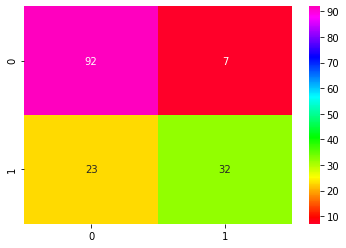

In [640]:
#Initialize the models 
LR=LogisticRegression() #Logistic regression.

evaluate(LR) #calling the function.

# if you like this notebook plz consider a upvote for me,,, happy kaggling !!!!!